In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [17]:
HDdata=pd.read_csv(r'C:\Users\Lenovo1\OneDrive - Springboard\Heart_Disease_Prediction.csv')

DATA CLEANING
Lets explore the data and understand what each field means


Age - Age of patient
Sex - Gender of patient Male = 1, Female =0
cp: chest pain type
  --Value 1: typical angina
  --Value 2: atypical angina
  --Value 3: non-anginal pain
  --Value 4: asymptomatic pain
BP- Blood Pressure
Cholesterol
FBS Over 120-  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
EKG results: resting electrocardiographic results
  -- Value 0: normal
  -- Value 1: having ST-T wave abnormality
  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
Max HR- Maximum Heart Rate
exercise induced angina 1 = yes; 0 = no
ST depression: induced by exercise relative to rest
ST slope: the slope of the peak exercise ST segment
  -- Value 1: upsloping
  -- Value 2: flat
  -- Value 3: downsloping
number of major vessels (0-3) colored by flourosopy
Thallum- Thalium stress test result (3 = normal; 6 = fixed defect; 7 = reversable defect)


We go through the dataset to see for any NULL values or any abnormality in the values and exclude them if necessary

In [18]:
HDdata.shape

(270, 14)

This dataset has 14 columns nd 270 rows

We now check for any Null values in the dataset

In [19]:
HDdata.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

There are no null values in this dataset which is a good thing

Now lets look into each column to understand the data and also look for any data abnormalities

In [20]:
# 0= Female, 1= Male lets look into the "Sex" column to see if it has any other data
HDdata['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [21]:
# Lets look into the Age column to understand the min and max age group the dateset belongs 
Minvalue=HDdata['Age'].min()
Maxvalue=HDdata['Age'].max()
print(Minvalue)
print(Maxvalue)

29
77


According to study statistics says, The incident rate of heart attacks per 10,000 people 
between 0 – 34 years is 0.3 per 10,000.
those in the age group of 35 – 44, the rate per 10,000 is below 7
Looking at our dataset the Min age starts from 29 

In [22]:
# Lets look into the Chest pain Type column to see if the given values fall between 1 to 4 
# cp: chest pain type
    #Value 1: typical angina
    #Value 2: atypical angina
    #Value 3: non-anginal pain
    #Value 4: asymptomatic
HDdata['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [23]:
# FBS Over 120-  (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
HDdata['FBS over 120'].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

In [24]:
# EKG results: resting electrocardiographic results should not have any value apart from {0,1,2}
HDdata['EKG results'].value_counts()

2    137
0    131
1      2
Name: EKG results, dtype: int64

In [25]:
# exercise induced angina should have value 1 & 0 
HDdata['Exercise angina'].value_counts()

0    181
1     89
Name: Exercise angina, dtype: int64

In [26]:
# the slope of the peak exercise ST segment value should lie between {1,2,3}
HDdata['Slope of ST'].value_counts()

1    130
2    122
3     18
Name: Slope of ST, dtype: int64

In [27]:
# Number of vessels fluro value should lie between {0,1,2,3}
HDdata['Number of vessels fluro'].value_counts()


0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

In [28]:
# Thallium value should lie between {3,6,7}
HDdata['Thallium'].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [29]:
HDdata['Heart Disease'] = HDdata['Heart Disease'] .replace(['Presence'],1)
HDdata['Heart Disease'] = HDdata['Heart Disease'] .replace(['Absence'],0)

Lets get some insgiths from the dataset

Text(0.5, 0, 'Age')

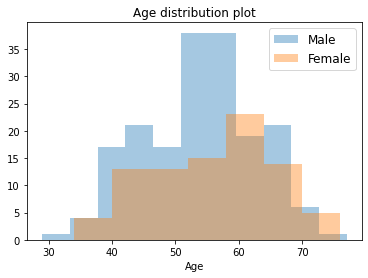

In [30]:
df = HDdata[HDdata.Sex == 1]
sns.distplot(df['Age'],kde= False,label='Male')
df = HDdata[HDdata.Sex ==0]
sns.distplot(df['Age'],kde= False,label='Female')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Age distribution plot')
plt.xlabel('Age')


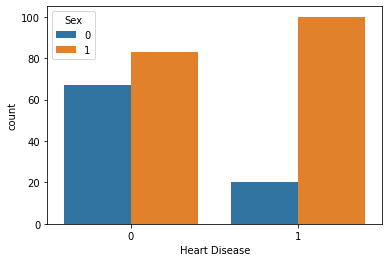

In [31]:
sns.countplot(x=HDdata['Heart Disease'], hue='Sex',data=HDdata)

Off the overall male count, ~50% of them have heart disease, compared to ~22% in female. Considering the fact that the male and female are not equally distributed, from this dataset it is good to say males are prone to heart disease compared to females

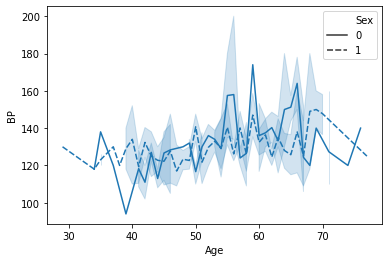

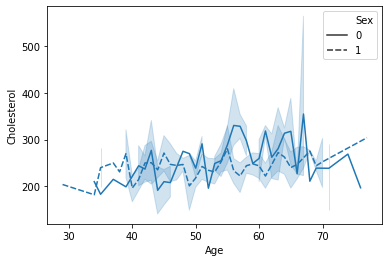

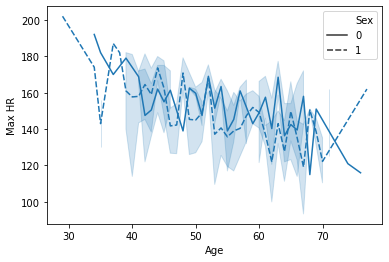

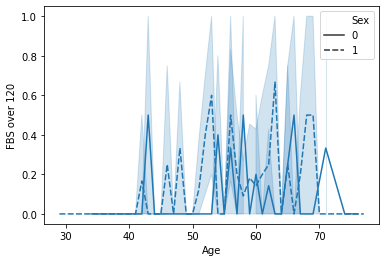

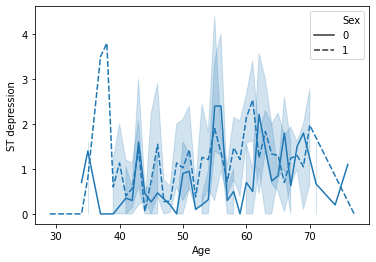

In [32]:
for i in HDdata[['BP','Cholesterol','Max HR','FBS over 120','ST depression']]:
    plt.figure()
    sns.lineplot(data=HDdata, x='Age', y=i,style='Sex')

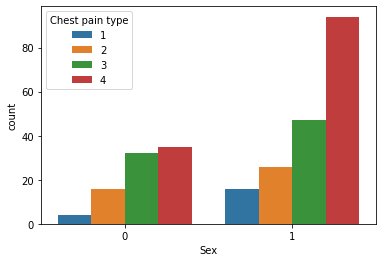

In [33]:
sns.countplot(HDdata['Sex'], hue='Chest pain type', data=HDdata)


From the above its clear that more males suffer from asymptomatic chest pain

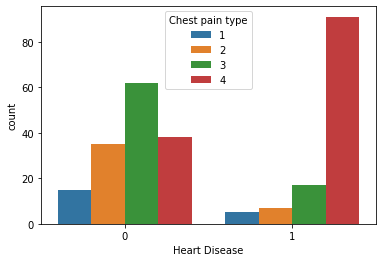

In [34]:
sns.countplot(HDdata['Heart Disease'], hue='Chest pain type', data=HDdata)


#From the above it is evident that the presence of these chest pains may or maynot be due to heart disease, though during the presence of heart disease there are high chances it causes asymptomatic chest pain

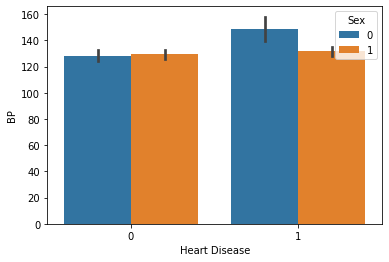

In [35]:
sns.barplot(x='Heart Disease', y='BP', data=HDdata, hue="Sex")

In [36]:
# Females have higher BP compared to men. High BP result in more chances of disease

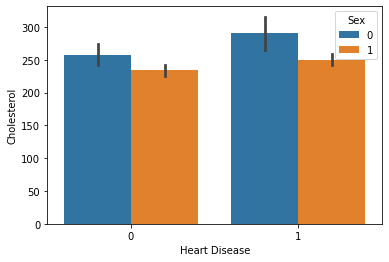

In [37]:
sns.barplot(x='Heart Disease', y='Cholesterol', data=HDdata, hue="Sex")

# Females have higher cholestrol compared to men. High cholestrol may be one of the reason to cause heart disease

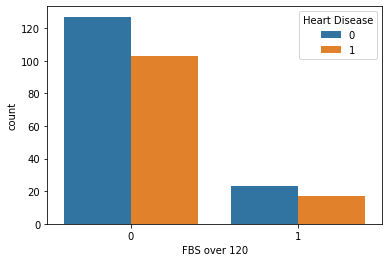

In [38]:
sns.countplot(HDdata['FBS over 120'], hue='Heart Disease', data=HDdata)

# The above chart is indicative that High FBS can be one of the factor to heart disease 

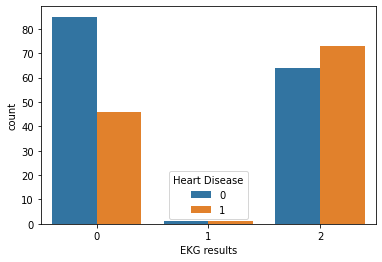

In [39]:
sns.countplot(HDdata['EKG results'], hue='Heart Disease', data=HDdata)

#From the abovee it is clear that people with probable or definite left ventricular hypertrophy (value=2) have more probability of getting heart disease

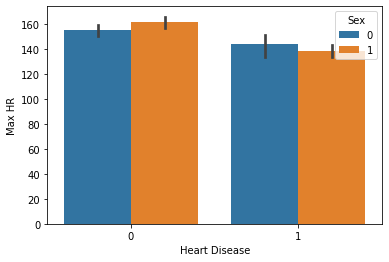

In [40]:
sns.barplot(x='Heart Disease', y='Max HR', data=HDdata, hue="Sex")

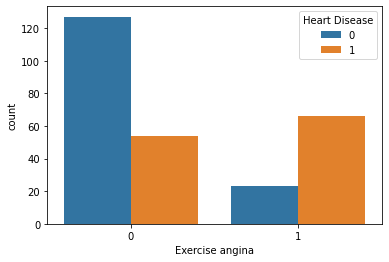

In [41]:
sns.countplot(HDdata['Exercise angina'], hue='Heart Disease', data=HDdata)

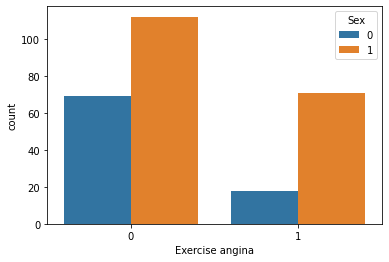

In [42]:
sns.countplot(HDdata['Exercise angina'], hue='Sex', data=HDdata)

# More cases of Heart disease were identified by Exercise induced Angina and it is clear that males have higher exercise Angina

Text(0.5, 0, 'ST Depression')

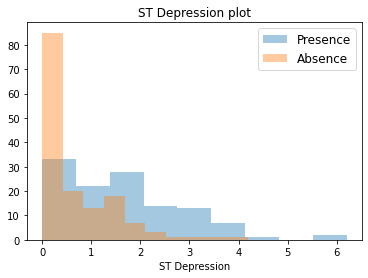

In [43]:
df = HDdata[HDdata['Heart Disease']== 1]
sns.distplot(df['ST depression'],kde= False,label='Presence')
df = HDdata[HDdata['Heart Disease']==0]
sns.distplot(df['ST depression'],kde= False,label='Absence')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('ST Depression plot')
plt.xlabel('ST Depression')

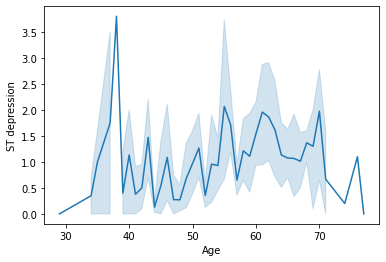

In [44]:
sns.lineplot(x=HDdata['Age'],y=HDdata['ST depression'],data=HDdata)

# ST Depression is higher between Age 30 to 40 

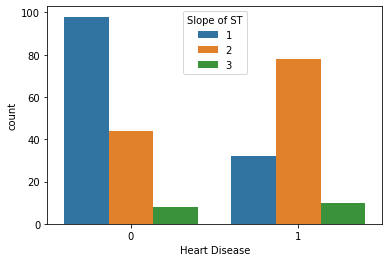

In [45]:
sns.countplot(HDdata['Heart Disease'], hue='Slope of ST', data=HDdata)

# There were more cases of Heart Disease with horizontal/Flat ST slope

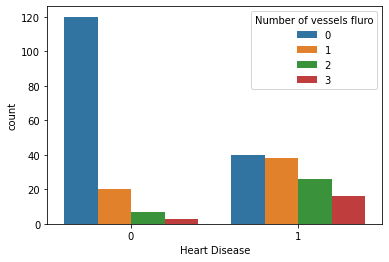

In [46]:
sns.countplot(HDdata['Heart Disease'], hue='Number of vessels fluro', data=HDdata)

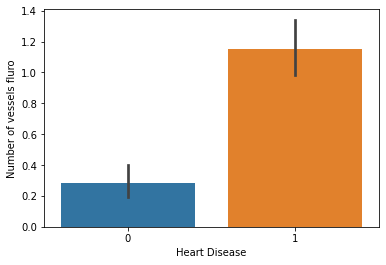

In [47]:
sns.barplot(x=HDdata['Heart Disease'],y=HDdata['Number of vessels fluro'],data=HDdata)

#people having high Number of vessels fluro have high chances of heart disease

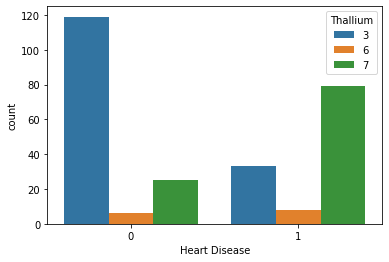

In [48]:
sns.countplot(HDdata['Heart Disease'], hue='Thallium', data=HDdata)

In [49]:
# Thallium test indicates high percentage of Heart Disease diagonised were reversable defect (Value=7) (meaning heart muscle is still salvageable)

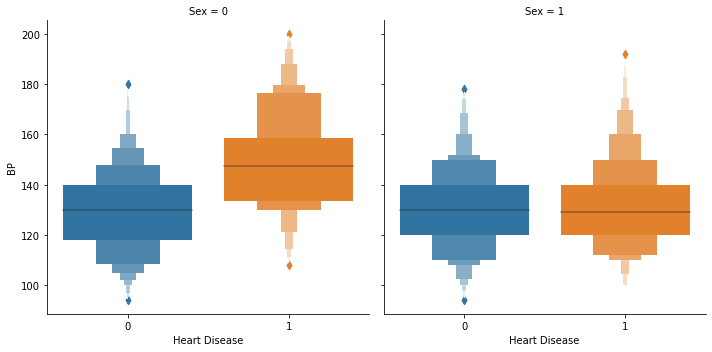

In [50]:
sns.catplot(x='Heart Disease', y='BP', data=HDdata, col='Sex', kind='boxen')

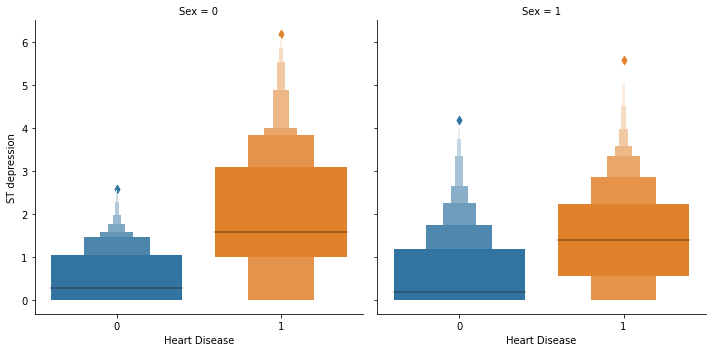

In [51]:
sns.catplot(x='Heart Disease', y='ST depression', data=HDdata, col='Sex', kind='boxen')

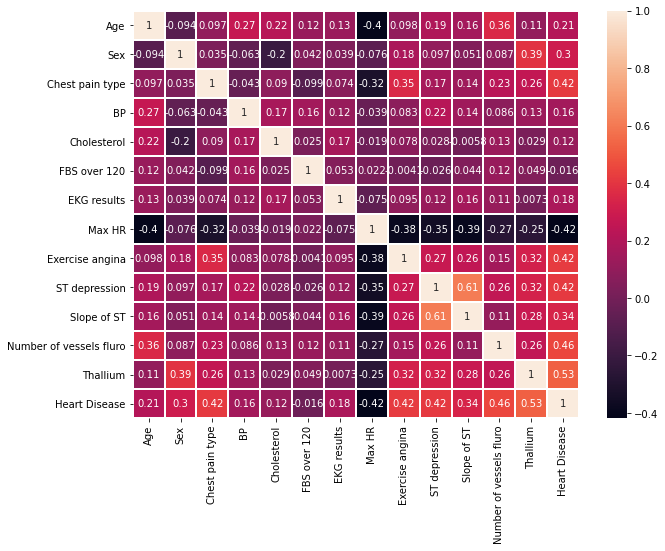

In [52]:
plt.figure(figsize=(10,7.5))
sns.heatmap(HDdata.corr(),annot=True, linewidth=1)

# There are few to many ML algorithm to predict categorical outcomes. Lets pick a couple of the technique and identify which has the most accuracy among them 
# We ll use Logistic and Random forest model in this notebook

# Lets look into what Logistic Regression is all about
# what is logistic regression? A technique used to predict a binary or dichotomous outcome based on a set of independent variables.
# A binary outcome is one where there are only two possible scenarios—either the event happens (1) or it does not happen (0). 

In [56]:
y_data=HDdata['Heart Disease']
x_data=HDdata.drop('Heart Disease',axis=1)

# Creating training Data and Test Data

In [80]:
from sklearn.model_selection import train_test_split
x_training_data,x_test_data,y_training_data,y_test_data=train_test_split(x_data,y_data,test_size=0.3)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Training the Logistic Model

In [61]:
model=LogisticRegression(max_iter=10000)
model.fit(x_training_data,y_training_data)

LogisticRegression(max_iter=10000)

In [62]:
predictions = model.predict(x_test_data)

In [63]:
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.82      0.83        51\n           1       0.71      0.73      0.72        30\n\n    accuracy                           0.79        81\n   macro avg       0.77      0.78      0.78        81\nweighted avg       0.79      0.79      0.79        81\n'

In [71]:
score_1=accuracy_score(y_test_data, predictions)
score_1

0.7901234567901234

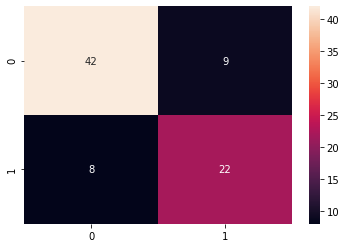

In [67]:
conf_matrix=confusion_matrix(y_test_data, predictions)
sns.heatmap(conf_matrix, annot=True)

#Random Forest Classifier

# Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” 
# It can be used for both classification and regression problems in R and Python. 

In [82]:
x_training_data1,x_test_data1,y_training_data1,y_test_data1=train_test_split(x_data,y_data,test_size=0.3)

In [83]:
model1=RandomForestClassifier(n_estimators=100)
model1.fit(x_training_data1,y_training_data1)
predictions1=model1.predict(x_test_data1)

In [84]:
classification_report(y_test_data1, predictions1)

'              precision    recall  f1-score   support\n\n           0       0.88      0.90      0.89        49\n           1       0.84      0.81      0.83        32\n\n    accuracy                           0.86        81\n   macro avg       0.86      0.86      0.86        81\nweighted avg       0.86      0.86      0.86        81\n'

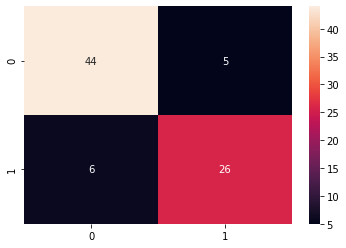

In [85]:
conf_matrix=confusion_matrix(y_test_data1, predictions1)
sns.heatmap(conf_matrix, annot=True)

In [88]:
score_2=accuracy_score(y_test_data1, predictions1)
score_2

0.8641975308641975

# Out of the 2 models tested in this notebook we see Random forest classifier has more accuracy than logistic regression 